<a href="https://colab.research.google.com/github/Tory9696/Depression_det/blob/main/DD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pandas scikit-learn matplotlib seaborn

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_frame_N.csv to Data_frame_N (4).csv


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

In [193]:
filename = next(iter(uploaded))
df = pd.read_csv(filename, encoding='cp1251', sep=';', index_col=False)
df = df.dropna(axis=1, how='all')

In [194]:
df['Имя'] = ['Пациент_' + str(i + 1) for i in range(len(df))]

df['Номер телефона'] = ['None'] * len(df)

def age_group(age):
  if age < 20:
    return 'До 20'
  elif age < 30:
    return '20-29'
  elif age < 40:
    return '30-39'
  elif age < 50:
    return '40-49'
  else:
    return '50+'

df['Возраст_группа'] = df['Возраст'].apply(age_group)
df['Пол'] = df['Пол'].map({'мужчина': 0, 'женщина': 1})
df.rename(columns={
    'Результат теста депрессии': 'Депрессия',
    'Результат теста тревожности': 'Тревожность'
}, inplace=True)

In [176]:
scaler = MinMaxScaler()
df[['Депрессия', 'Тревожность']] = scaler.fit_transform(df[['Депрессия', 'Тревожность']])

df['Психоэмоциональное состояние'] = df['Психоэмоциональное состояние'].str.lower().str.strip()
df['Депрессивное_состояние'] = df['Психоэмоциональное состояние'].str.lower().apply(lambda x: 1 if x == 'депрессия' else 0)

X = df[['Пол', 'Депрессия', 'Тревожность']]
y = df['Депрессивное_состояние']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точность: {accuracy:.3f}")
print(f"Полнота: {recall:.3f}")
print(f"F1-мера: {f1:.3f}")
print("\nПодробный отчёт:\n", classification_report(y_test, y_pred))

Точность: 1.000
Полнота: 1.000
F1-мера: 1.000

Подробный отчёт:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



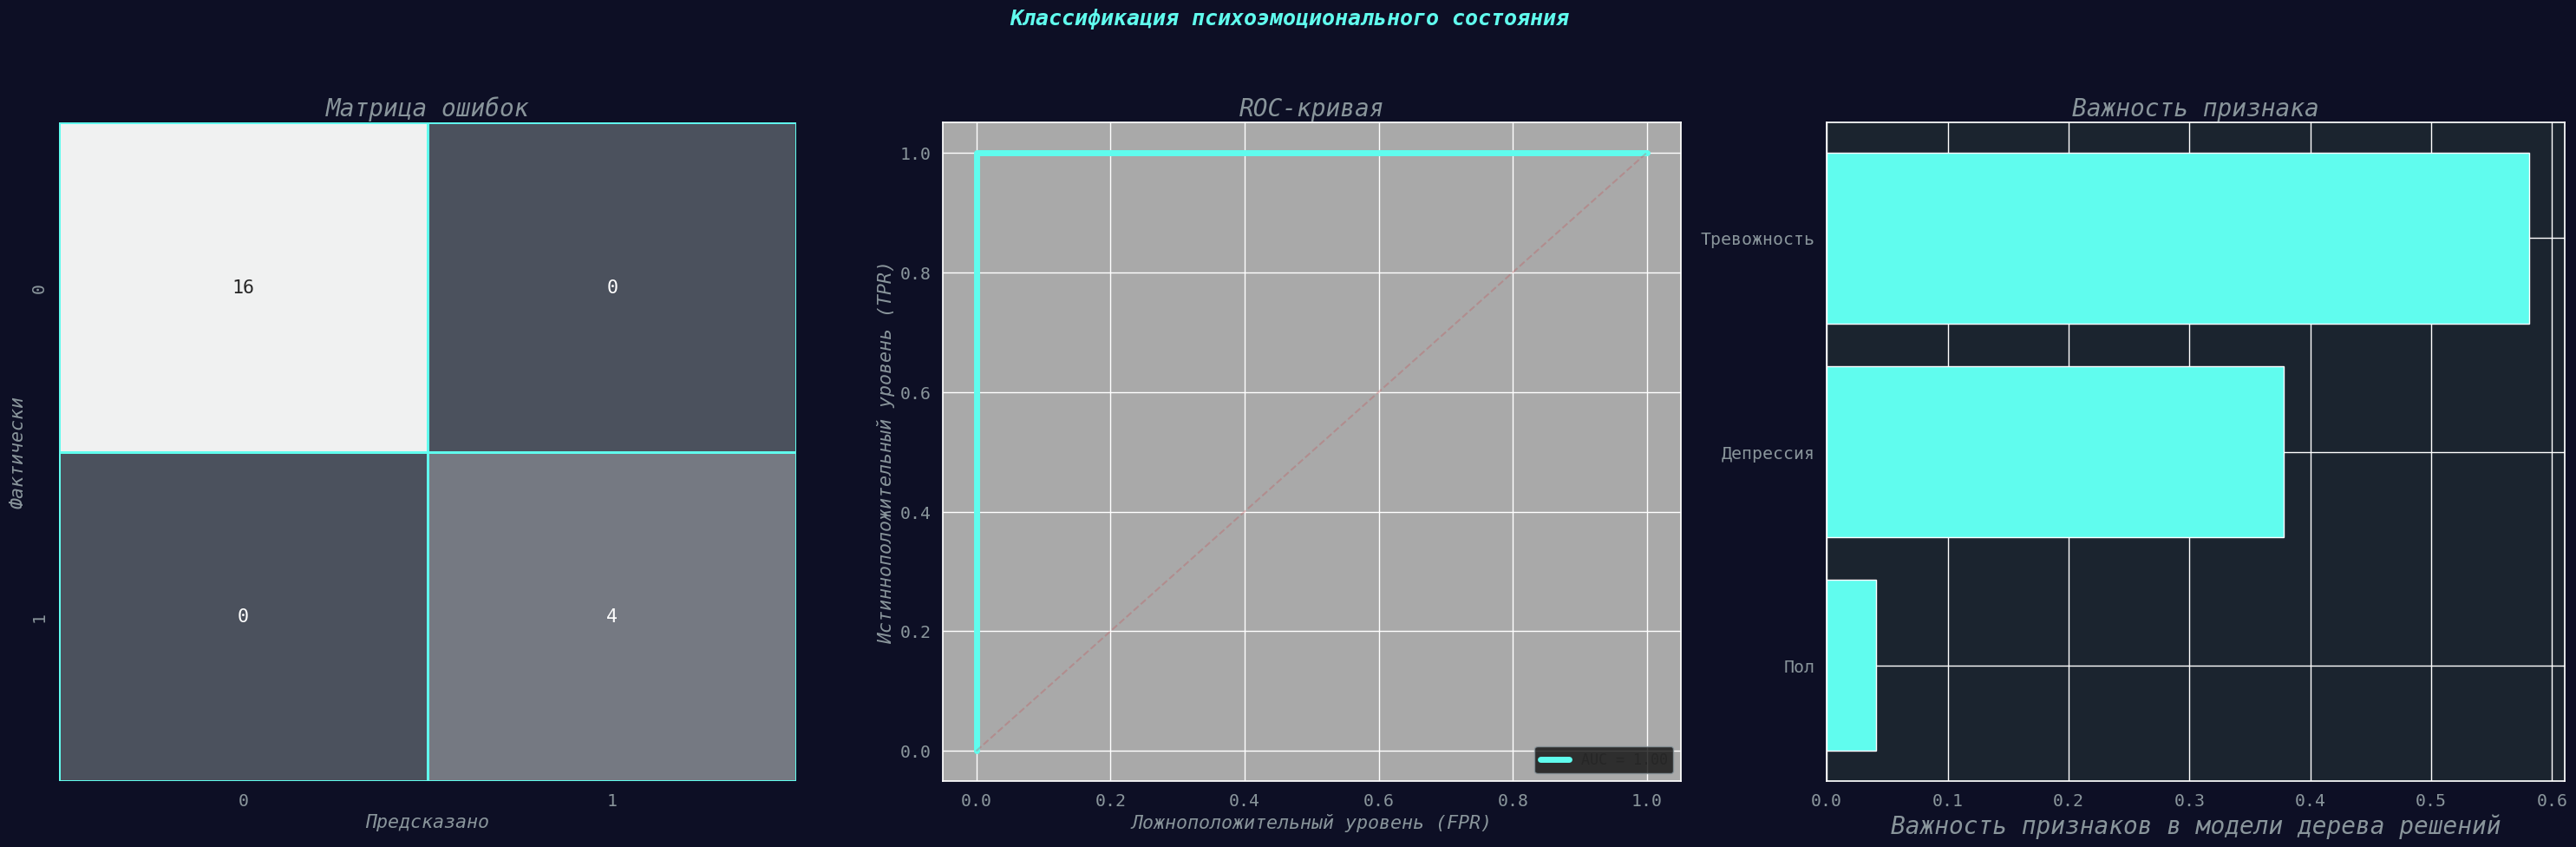

In [192]:
feature_importance = clf.feature_importances_
features = X.columns

y_prob = clf.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.style.use('dark_background')
sns.set(font_scale=1.3, font='DejaVu Sans Mono')
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.patch.set_facecolor('#0D0F25')

sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette("#4B515D", as_cmap=True, reverse=True),
            ax=axes[0], cbar=False, linewidths=2, linecolor='#60FCEE')
axes[0].set_title('Матрица ошибок', fontsize=20, fontstyle='italic', color='#89959B')
axes[0].set_xlabel('Предсказано', fontstyle='italic', color='#89959B')
axes[0].set_ylabel('Фактически', fontstyle='italic', color='#89959B')
axes[0].tick_params(colors='#89959B')

axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='#60FCEE', linewidth=5)
axes[1].plot([0, 1], [0, 1], 'r--', alpha=0.3)
axes[1].set_facecolor('darkgray')
axes[1].set_title('ROC-кривая', fontsize=20, fontstyle='italic', color='#89959B')
axes[1].set_xlabel('Ложноположительный уровень (FPR)', fontstyle='italic', color='#89959B')
axes[1].set_ylabel('Истинноположительный уровень (TPR)', fontstyle='italic', color='#89959B')
axes[1].legend(loc='lower right', frameon=True, facecolor='#0f0f0f', edgecolor='#89959B', fontsize=12)
axes[1].tick_params(colors='#89959B')

axes[2].barh(features, feature_importance, color='#60FCEE')
axes[2].set_facecolor('#1B242F')
axes[2].set_title("Важность признака",  fontsize=20, fontstyle='italic', color='#89959B')
axes[2].set_xlabel("Важность признаков в модели дерева решений", fontsize=20, fontstyle='italic', color='#89959B')
axes[2].tick_params(colors='#89959B')

plt.suptitle('Классификация психоэмоционального состояния', fontsize=18, fontweight='bold', fontstyle='italic', color='#60FCEE')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()